## Generate or develop a perceptron algorithm using the first two classes of the MNIST dataset based on the following architectures:

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [271]:
import keras
from keras import models
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

#### 1a. When you have two neurons at the output layer

In [243]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [244]:
# First 2 classes 0 and 1

train_classes = y_train<2 
y_train = y_train[train_classes]
x_train = x_train[train_classes]
test_classes = y_test<2
y_test = y_test[test_classes]
x_test = x_test[test_classes]

In [245]:
# Adding 1s to every image to eliminate the 0s
for i in range(len(x_train)):
  x_train[i] += 1
for i in range(len(x_test)):
  x_test[i] += 1

In [246]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [247]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [248]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2, activation='softmax'))

In [249]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [250]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1)

Epoch 1/10
99/99 [==============================] - 2s 13ms/step - loss: 3.0028 - accuracy: 0.9848
Epoch 2/10
99/99 [==============================] - 1s 13ms/step - loss: 0.2347 - accuracy: 0.9968
Epoch 3/10
99/99 [==============================] - 1s 12ms/step - loss: 0.1333 - accuracy: 0.9981
Epoch 4/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0861 - accuracy: 0.9977
Epoch 5/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0304 - accuracy: 0.9988
Epoch 6/10
99/99 [==============================] - 1s 13ms/step - loss: 0.0386 - accuracy: 0.9984
Epoch 7/10
99/99 [==============================] - 1s 13ms/step - loss: 0.0486 - accuracy: 0.9983
Epoch 8/10
99/99 [==============================] - 1s 13ms/step - loss: 0.0860 - accuracy: 0.9983
Epoch 9/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0112 - accuracy: 0.9996
Epoch 10/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0292 - accuracy: 0.9987


In [251]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16334760189056396
Test accuracy: 0.9971631169319153


In [252]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
confusion_matrix(y_test,y_pred)

array([[ 977,    3],
       [   3, 1132]])

#### 1b. When you have single neuron at the output layer

In [253]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [254]:
# First 2 classes 0 and 1

train_classes = y_train<2 
y_train = y_train[train_classes]
x_train = x_train[train_classes]
test_classes = y_test<2
y_test = y_test[test_classes]
x_test = x_test[test_classes]

In [255]:
# Adding 1s to every image to eliminate the 0s
for i in range(len(x_train)):
  x_train[i] += 1
for i in range(len(x_test)):
  x_test[i] += 1

In [256]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [257]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

In [258]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [259]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose=1)

Epoch 1/10
99/99 [==============================] - 2s 12ms/step - loss: 1.5501 - accuracy: 0.9873
Epoch 2/10
99/99 [==============================] - 1s 13ms/step - loss: 0.1620 - accuracy: 0.9970
Epoch 3/10
99/99 [==============================] - 2s 15ms/step - loss: 0.1408 - accuracy: 0.9980
Epoch 4/10
99/99 [==============================] - 1s 13ms/step - loss: 0.0475 - accuracy: 0.9983
Epoch 5/10
99/99 [==============================] - 1s 12ms/step - loss: 0.1215 - accuracy: 0.9976
Epoch 6/10
99/99 [==============================] - 1s 13ms/step - loss: 0.0687 - accuracy: 0.9983
Epoch 7/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0144 - accuracy: 0.9993
Epoch 8/10
99/99 [==============================] - 1s 12ms/step - loss: 0.1516 - accuracy: 0.9979
Epoch 9/10
99/99 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 10/10
99/99 [==============================] - 1s 11ms/step - loss: 0.0311 - accuracy: 0.9991


In [260]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20656120777130127
Test accuracy: 0.9962174892425537


In [269]:
y_pred = model.predict(x_test).astype(np.uint8)
confusion_matrix(y_test,y_pred)

array([[ 978,    2],
       [   5, 1130]])

Which type of the network performs best and why?:

Both networks are giving an accuracy of 99%. The difference between the two is the use of 1D Arrays and 2D Arrays as well as softmax and sigmoid function as test dataset. Furthermore, both networks differ with respect to loss functions. Two output network uses categorical cross entropy loss function and One output network makes use of binary cross entropy.

### 2. (15 pts) Develop a perceptron algorithm for each of the following logic gate: AND, OR, and XOR

In [29]:
# Perceptron for AND Gate

def ANDGate(x):
    w = np.array([1, 1])
    b = -1.5
    y = np.dot(w, x) + b
    if y >= 0:
      return 1
    else:
      return 0

print("AND(0,0) = ",ANDGate([0, 0]))
print("AND(0,1) = ",ANDGate([0, 1]))
print("AND(1,0) = ",ANDGate([1, 0]))
print("AND(1,1) = ",ANDGate([1, 1]))

AND(0,0) =  0
AND(0,1) =  0
AND(1,0) =  0
AND(1,1) =  1


In [28]:
# Perceptron for OR Gate

def ORGate(x):
    w = np.array([1, 1])
    b = -0.5
    y = np.dot(w, x) + b
    if y >= 0:
      return 1
    else:
      return 0

print("OR(0,0) = ",ORGate([0, 0]))
print("OR(0,1) = ",ORGate([0, 1]))
print("OR(1,0) = ",ORGate([1, 0]))
print("OR(1,1) = ",ORGate([1, 1]))

OR(0,0) =  0
OR(0,1) =  1
OR(1,0) =  1
OR(1,1) =  1


In [34]:
# Perceptron for XOR Gate

def NOTGate(x):
    w = -1
    b = 0.5
    y = np.dot(w, x) + b
    if y >= 0:
      return 1
    else:
      return 0

def XORGate(x):
    w = [1,1]
    final_x = np.array([NOTGate(ANDGate(x)), ORGate(x)])
    b = -1.5
    y = np.dot(w, final_x) + b
    if y >= 0:
      return 1
    else:
      return 0

print("XOR(0,0) = ",XORGate([0, 0]))
print("XOR(0,1) = ",XORGate([0, 1]))
print("XOR(1,0) = ",XORGate([1, 0]))
print("XOR(1,1) = ",XORGate([1, 1]))

XOR(0,0) =  0
XOR(0,1) =  1
XOR(1,0) =  1
XOR(1,1) =  0


### 3. (2 pts) What is the difference between a validation set and a test set? Discuss in brief.
The validation set is a set of examples used to tune the hyper-parameters of a classifier In the MLP case, we would use the validation set to find the “optimal” number of hidden units or determine a stopping point for the back-propagation algorithm.

The test set is a set of examples used only to assess the performance of a fully-trained classifier. In the MLP case, we would use the test to estimate the error rate after we have chosen the final model. After assessing the final model on the test set, no further tuning is required.

### 4. (3 pts) Why should we not prefer the accuracy metric if the dataset is not balanced? Which set (train, validation, or test) of the database should be balanced to use the accuracy metric?

In a dataset with a 1:100 class imbalance, each example of the minority class 1 will have a corresponding 100 examples for the majority class 0. The majority class represents “normal” and the minority class represents “abnormal,”. Good performance on the minority class will be preferred over good performance on both classes. A model that predicts the majority class 0 for all examples in the test set will have a classification accuracy of 99 percent, mirroring the distribution of major and minor examples expected in the test set on average. Many machine learning models are designed around the assumption of balanced class distribution, and often learn simple rules like always predict the majority class, causing them to achieve an accuracy of 99 percent, although in practice performing no better than an unskilled majority class classifier.

Ideally all 3, training, test and validation sets need to be balanced for accuracy metric but its much easier to use a balanced training set to trust the accuracy of the model. 


### 5. (5 pts) Using the images of the MIST dataset, apply the different data augmentation techniques using your python programming and showcase the generated samples.

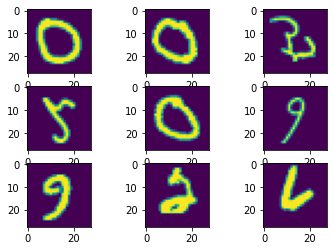

In [273]:
# Random Flipping Data Augmentation

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)
for x, y in datagen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x[i].reshape(28, 28))
	plt.show()
	break

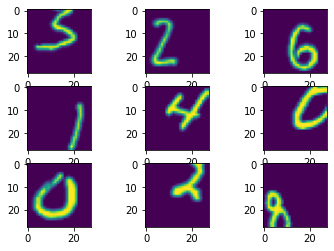

In [278]:
# Random Shifting Data Augmentation

shift = 0.3
datagen1 = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen1.fit(x_train)
for x,y in datagen1.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x[i].reshape(28, 28))
	plt.show()
	break